## 판다스 (Pandas) 라이브러리

### 데이터 타입 변환

시리즈에 저장된 데이터가 문자열 타입으로 저장돼 있다고 가정해봅시다. 이러한 경우 덧셈 및 뺄셈 등의 연산을 적용할 수 없기 때문에 데이터 타입을 변경할 수 있어야 합니다. 

In [1]:
from pandas import Series

s = Series(["100", "200", "300"])
print(s.dtype)

object


파이썬 기초 문법에서도 문자열과 숫자는 더할 수 없습니다. 형변환 후 같은 데이터 타입간의 연산을 적용해야 합니다.

In [ ]:
int(  "100"   )   + 10

110

`astype` 메서드는 데이터의 타입을 변경합니다. 

In [ ]:
import numpy as np

s = s.astype(   np.uint64   )
print(s.dtype)

uint64


In [ ]:
s + 100

0    200
1    300
2    400
dtype: uint64

만약 문자열 데이터에 콤마(`,`)가 파함돼 있다면 `astype` 메서드는 변환에 실패하고 에러 메시지를 출력합니다.   

In [ ]:
# 슬라이싱으로 콤마를 지우고 숫자로 변환
# replace 콤마를 제거 후에 숫자로 변환
"1,000" + 10

TypeError: ignored

In [ ]:
s = Series(["1,000", "2,000", "3,000"])
s

0    1,000
1    2,000
2    3,000
dtype: object

`ValueError: invalid literal for int() with base 10: '1,000'`

시리즈의 `replace` 메서드를 사용하면 데이터를 한 번에 치환할 수 있습니다. 

In [ ]:
s = Series(["1,000", "2,000", "3,000"])
# 정규식을 지원한다.
s.replace(",", "", regex=True).astype(np.int16)

0    1000
1    2000
2    3000
dtype: int16

In [ ]:
a = "1,000"
a.replace(",", "")

'1000'

In [ ]:
class MyStr:
    def replace(self, x, y):
        pass

class MySeries:
    def replace(self, x, y):
        pass

`regex` 옵션을 추가하면 패턴을 검색한 후 치환을 시도합니다. (문자열의 replace와 이름은 동일하고 동작은 유사하지만 다른 클래스의 메서드입니다.)

In [ ]:
s.replace(",", "", regex=True)

0    1000
1    2000
2    3000
dtype: int16

불필요한 데이터를 치환한 다음 타입을 변경합니다. 

In [ ]:
a = "1,000"
a.replace(",", "")

'1000'

In [ ]:
%timeit s.replace(",", "", regex=True).astype(np.int16)

The slowest run took 4.63 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 151 µs per loop


문자열 데이터가 저장돼 있을 때 사용

In [ ]:
s.str[0]

0    1
1    2
2    3
dtype: object

In [ ]:
s.str[2:]

0    000
1    000
2    000
dtype: object

In [ ]:
t = s.str[0] + s.str[2:]
t.astype(np.int16)

0    1000
1    2000
2    3000
dtype: int16

In [ ]:
%timeit (s.str[0] + s.str[2:]).astype(np.int16)

1000 loops, best of 5: 571 µs per loop


In [ ]:
%timeit s.str.replace(",", "").astype(np.int16)

1000 loops, best of 5: 251 µs per loop


`시리즈에 조건을 넣을 때 // 이중 조건은 어떻게 할 수 있나요? if조건문 안에 if조건문을 넣은것 처럼요!`  
-> `&` , `|` 

In [ ]:
s = Series([100, 200, 300])
cond0 = s > 100
cond1 = s < 300
s.loc[ cond0 & cond1 ]

1    200
dtype: int64

In [ ]:
s.loc[ (s > 100) & (s < 300) ]

1    200
dtype: int64

Q. Series에 저장된 값을 다음과 같이 변경하라. 

| index | values | 
| ---- | ---- |
| 0 | 38000 | 
| 1 | 28000 | 

In [ ]:
s = Series(["3만 8천", " 2만 8천"])
s

0     3만 8천
1     2만 8천
dtype: object

In [ ]:
s.replace("만 ", "", regex=True).replace("천", "", regex=True).astype(np.uint64) * 1000

0    38000
1    28000
dtype: uint64

In [ ]:
s.replace("\D", "", regex=True).astype(np.uint64) * 1000

0    38000
1    28000
dtype: uint64

### 시리즈와 Map
시리즈를 사용하다 보면 시리즈가 지원하는 기본 연산 (덧셈, 뺄셈, 곱셈, 나눗셈) 이외에도 복잡한 형태의 사용자 정의 코드를 적용하고 싶은 경우가 있습니다. 예를 들어 시리즈에 저장된 성적을 학점으로 변경하기 위한 파이썬의 기본 함수는 없습니다. 사용자가 작성한 함수를 전체 시리즈에 적용하는 방법이 필요한데, 이를 `map` 함수로 해결합니다. 

In [2]:
s = Series([3, 13, 23])
print(s)

0     3
1    13
2    23
dtype: int64


In [ ]:
def func( x ):
    return x + 10

s.map(  func  )

0    13
1    23
2    33
dtype: int64

In [ ]:
s + 10

0    13
1    23
2    33
dtype: int64

시리즈의 점수를 다음 조건의 학점으로 변경해 봅시다. 

| 점수구간 | 학점 |
| ---- | ---- |
| 20 - 29 | A |
| 10 - 19 | B |
| 0 - 9 | C |

In [ ]:
def func( x ):
    if x < 10:
        return "C"
    elif x < 20:
        return "B"
    else:
        return "A"

s.map(  func  )

0    C
1    B
2    A
dtype: object

In [ ]:
s

0     3
1    13
2    23
dtype: int64

In [ ]:
def aa(  x  ):
    print("hi")
    x(    )
    print("bye")

def bb():
    print("zzz")

aa (   bb    )

hi
zzz
bye


In [ ]:
# 모듈설치필요
# !pip install pybithumb
import pybithumb

btc = pybithumb.get_candlestick("BTC")

# 4000만원은 - 비싸
# 2000만원은 - 적정
# 미만은     - 거저

In [ ]:
def func (x):
    if x > 40000000:
        return "비싸"
    elif x > 20000000:
        return "적정"
    else:
        return "거저"

a = btc['close'].map(   func     )
a

time
2013-12-27 00:00:00    거저
2013-12-28 00:00:00    거저
2013-12-29 00:00:00    거저
2013-12-30 00:00:00    거저
2013-12-31 00:00:00    거저
                       ..
2022-04-15 00:00:00    비싸
2022-04-16 00:00:00    비싸
2022-04-17 00:00:00    비싸
2022-04-18 00:00:00    비싸
2022-04-19 11:00:00    비싸
Name: close, Length: 2946, dtype: object

한글 때문에  깨지는데 현재 단계에서는 무시합시다. 나중에 설명해요.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49912 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

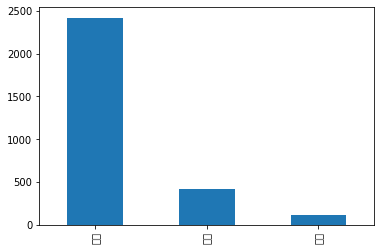

In [ ]:
a.value_counts().plot.bar()

`cut` 함수를 사용하면 더욱 쉽게 수치형 데이터를 범주형 데이터로 변환할 수 있습니다.   
- `bins`와 `labels` 옵션을 사용합니다. 

In [4]:
import pandas as pd 
pd.cut(s, bins=[0, 10, 20, 30])

0     (0, 10]
1    (10, 20]
2    (20, 30]
dtype: category
Categories (3, interval[int64, right]): [(0, 10] < (10, 20] < (20, 30]]

In [5]:
pd.cut(s, bins=[0, 10, 20, 30], labels=['C', 'B', 'A'])

0    C
1    B
2    A
dtype: category
Categories (3, object): ['C' < 'B' < 'A']

Q. `map` 연산을 사용해서 시리즈에 저장된 값으로 학점을 판별하라.
- 90점 이상이면 A
- 70점 이상이면 B
- 나머지 F

연산 적용 결과
```
영수    A
철수    B
영희    F
```

In [6]:
def func(x):
    if x >= 90:
        return "A"
    elif x >= 70:
        return "B"
    else:
        return "F"

s = Series([94, 74, 30], index=['영수', '철수', '영희'])
s.map(func)

영수    A
철수    B
영희    F
dtype: object

Q. `map` 연산을 사용해서 시리즈에 저장된 값에 다음 연산을 적용하라. 
- 0 이상 이면 값을 2배 키우고,
- 0 보다 작으면 값을 10 뺀다

연산 적용 결과
```
0    20
1     6
2   -13
dtype: int64
```

In [7]:
def func(x):
    if x >= 0:
        return x * 2
    else:
        return x - 10

s = Series([10, 3, -3])
s.map(func)

0    20
1     6
2   -13
dtype: int64

### 시리즈 정렬
`sort_values` 메서드를 사용하면 쉽게 데이터를 정렬할 수 있습니다.  
- `ascending` 값에 따라 오름차순 혹은 내림차순으로 정렬됩니다. 

In [8]:
from pandas import Series

data = [3.1, 2.0, 10.1, 5.1]
index = ["000010", "000020", "000030", "000040"]
s = Series(data=data, index=index)

s.sort_values()

000020     2.0
000010     3.1
000040     5.1
000030    10.1
dtype: float64

내림차순 정렬하기

In [9]:
s.sort_values(ascending=False)

000030    10.1
000040     5.1
000010     3.1
000020     2.0
dtype: float64

`sort_index` 메서드는 인덱스를 기준으로 정렬합니다.

In [10]:
s.sort_index()

000010     3.1
000020     2.0
000030    10.1
000040     5.1
dtype: float64

In [11]:
s.sort_index(ascending=False)

000040     5.1
000030    10.1
000020     2.0
000010     3.1
dtype: float64

### 데이터 순위
`rank` 메서드는 순위를 측정합니다.

In [12]:
s.rank()

000010    2.0
000020    1.0
000030    4.0
000040    3.0
dtype: float64

### 데이터 갯수 세기

시리즈에 저장된 데이터들의 출현 빈도를 세는 함수 `value_counts`

In [13]:
import numpy as np

s = Series(np.random.randint(10, size=100))
s.value_counts()

6    12
0    11
5    11
3    11
2    11
9    10
4    10
1     9
7     8
8     7
dtype: int64